In [155]:
#Import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn import metrics
np.random.seed(0)

In [156]:
#Read Excel sheet and Generate Dataframe object

df = pd.read_excel('data_science_sample_data_v1.xlsx')
pd.set_option('display.max_columns', 24)
df.columns

Index(['Application_ID', 'Current City', 'Python (out of 3)',
       'R Programming (out of 3)', 'Deep Learning (out of 3)',
       'PHP (out of 3)', 'MySQL (out of 3)', 'HTML (out of 3)',
       'CSS (out of 3)', 'JavaScript (out of 3)', 'Unnamed: 10',
       'AJAX (out of 3)', 'Bootstrap (out of 3)', 'MongoDB (out of 3)',
       'Node.js (out of 3)', 'ReactJS (out of 3)', 'Other skills', 'Degree',
       'Stream', 'Current Year Of Graduation', 'Performance_PG',
       'Performance_UG', 'Performance_12', 'Performance_10'],
      dtype='object')

In [157]:
#Rename required column names

df.rename(columns = {"Python (out of 3)": "Python", 
                    "R Programming (out of 3)":"R",
                    "Deep Learning (out of 3)":"DL",
                    "PHP (out of 3)": "PHP",
                    "MySQL (out of 3)": "MySql",
                    "HTML (out of 3)": "HTML",
                    "CSS (out of 3)": "CSS",
                    "JavaScript (out of 3)": "Javascript",
                    "AJAX (out of 3)": "Ajax",
                    "Bootstrap (out of 3)": "CSS",
                    "MongoDB (out of 3)": "MongoDB",
                    "Node.js (out of 3)": "NodeJs",
                    "ReactJS (out of 3)": "ReactJs",
                    "Current Year Of Graduation": "Gr_Year",
                    "Performance_PG": "Per_PG",
                    "Performance_UG": "Per_UG",
                    "Performance_12": "Per_12",
                    "Performance_10": "Per_10",
                  },inplace = True) 

In [158]:
#Function : To calculate Percentile of individual record for column PG & UG

def calculate_percent(tmp_df, col_name):
    tmp_lst = []
    for i in range(len(tmp_df)):
        val = tmp_df[col_name][i]
        if not pd.isna(val):
            lst = val.split('/')
            percent = float(lst[0]) / float(lst[1])
            tmp_lst.append(percent)
        else:
            tmp_lst.append('NaN')
    return tmp_lst

In [159]:
#Add New calculated columns for PG & UG

pg_df = pd.DataFrame(calculate_percent(df, 'Per_PG'))
df['cal_PG'] = pg_df

ug_df = pd.DataFrame(calculate_percent(df, 'Per_UG'))
df['cal_UG'] = ug_df

In [160]:
#Function : To calculate Percentage of 10th and 12th

def calculate_10_12(tmp_df, col_name):
    tmp_lst = []
    for i in range(len(tmp_df)):
        val = tmp_df[col_name][i]
        if not pd.isna(val):
            lst = val.split('/')
            tmp_lst.append(float(lst[0])/100)
        else:
            tmp_lst.append(0)
    return tmp_lst

In [161]:
#Add new calculated column for 10th & 12th

twelth_df = pd.DataFrame(calculate_10_12(df, 'Per_12'))
df['cal_12'] = twelth_df

tenth_df = pd.DataFrame(calculate_10_12(df, 'Per_10'))
df['cal_10'] = tenth_df

In [162]:
# Function to find out Average Percentage of PG, UG, 12th & 10th
# If candidate's Qualification is up to 12th Standard then those candidate should not be count in the list.
# We had keep Min. Qualification is Under-graduate is required.

def final_Average(tmp_df):
    lst = []
    for i in range(len(tmp_df)):
        
        pg = tmp_df['cal_PG'][i]
        ug = tmp_df['cal_UG'][i]
        twelve = tmp_df['cal_12'][i]
        tenth = tmp_df['cal_10'][i]
    
        div = 0
        total = 0
        if pg != 'NaN': 
            div += 1 
            total += pg
        if ug != 'NaN': 
            div += 1 
            total += ug
        if twelve != 'NaN': 
            div += 1 
            total += twelve
        if tenth != 'NaN': 
            div += 1 
            total += tenth
        if div != 0: 
            if ug != 'NaN' or pg != 'NaN':
                tot_div = total / div
                lst.append(tot_div)
            else:
                lst.append(0)
        else:
            lst.append(0)

    return lst

In [163]:
#Add new calculated column as final_average

final_avg = pd.DataFrame(final_Average(df))
df['final_avg'] = final_avg

In [164]:
#Function : to which is filter candidate based on final average percentage and if candidate Average percentage is
#more than 75%, means distiction then they are shortlisted. We can change any percentage criteria as per company norms.

def shortlisted_or_not(temp_df):
    tmp_list = []
    a = 0
    for i in range(len(temp_df)):
        val = temp_df['final_avg'][i] * 100
        if (val >= 75):
            tmp_list.append(1)
            a = a+1
        else:
            tmp_list.append(0)
    print("Total distiction candidate : ",a)
    return tmp_list

In [165]:
#Added new column as Result (0) - Shortlisted, (1) - Not shortlisted.

result = pd.DataFrame(shortlisted_or_not(df))
df['Result'] = result

Total distiction candidate :  53


In [166]:
#Drop unnecessary columns from the dataframe.

data = df.drop(['Current City','Gr_Year','Unnamed: 10','Other skills','Degree','Stream','Per_PG','Per_UG','Per_12','Per_10',], axis=1)

In [167]:
#This dataframe is for 'Web development' Position, So removed Unrelated columns from the DF.
web_data = data.drop(['Application_ID','Python','R','DL'], axis=1)
web_data

,PHP,MySql,HTML,CSS,Javascript,Ajax,CSS,MongoDB,NodeJs,ReactJs,cal_PG,cal_UG,cal_12,cal_10,final_avg,Result
0,2,0,2,3,2,0,2,0,0,0,NaN,NaN,0.0000,0.0000,0.000000,0
1,2,2,2,2,2,0,0,0,0,0,NaN,0.855,0.9220,0.9660,0.914333,1
2,2,2,2,0,2,0,0,0,0,0,0.791,0.7,0.6483,0.7760,0.728825,0
3,1,0,2,0,0,0,0,0,0,0,NaN,0.686,0.7600,0.8432,0.763067,1
4,2,0,2,1,1,0,0,2,2,2,NaN,0.638,0.6520,0.6880,0.659333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,0,0,2,0,0,0,0,0,0,0,NaN,0.75,0.0000,0.0000,0.250000,0
388,2,0,2,2,1,0,0,0,0,0,0.778,0.68,0.0000,0.0000,0.364500,0
389,0,0,2,2,1,0,0,0,0,0,NaN,0.61,0.6262,0.0000,0.412067,0
390,0,0,0,0,0,0,0,0,0,0,NaN,0.65,0.6250,0.7650,0.680000,0


In [168]:
#This dataframe is for 'Data Scientist' Position, So remove other Unrelated columns

DS_Data = data.drop(['PHP','MySql','HTML','CSS','Javascript','Ajax','CSS','MongoDB', 'NodeJs','ReactJs'], axis=1)
DS_Data

,Application_ID,Python,R,DL,cal_PG,cal_UG,cal_12,cal_10,final_avg,Result
0,ML0001,0,2,0,NaN,NaN,0.0000,0.0000,0.000000,0
1,ML0002,2,0,0,NaN,0.855,0.9220,0.9660,0.914333,1
2,ML0003,3,0,1,0.791,0.7,0.6483,0.7760,0.728825,0
3,ML0004,2,0,2,NaN,0.686,0.7600,0.8432,0.763067,1
4,ML0005,2,0,0,NaN,0.638,0.6520,0.6880,0.659333,0
...,...,...,...,...,...,...,...,...,...,...
387,ML0388,2,1,0,NaN,0.75,0.0000,0.0000,0.250000,0
388,ML0389,2,0,0,0.778,0.68,0.0000,0.0000,0.364500,0
389,ML0390,1,0,0,NaN,0.61,0.6262,0.0000,0.412067,0
390,ML0391,2,2,0,NaN,0.65,0.6250,0.7650,0.680000,0


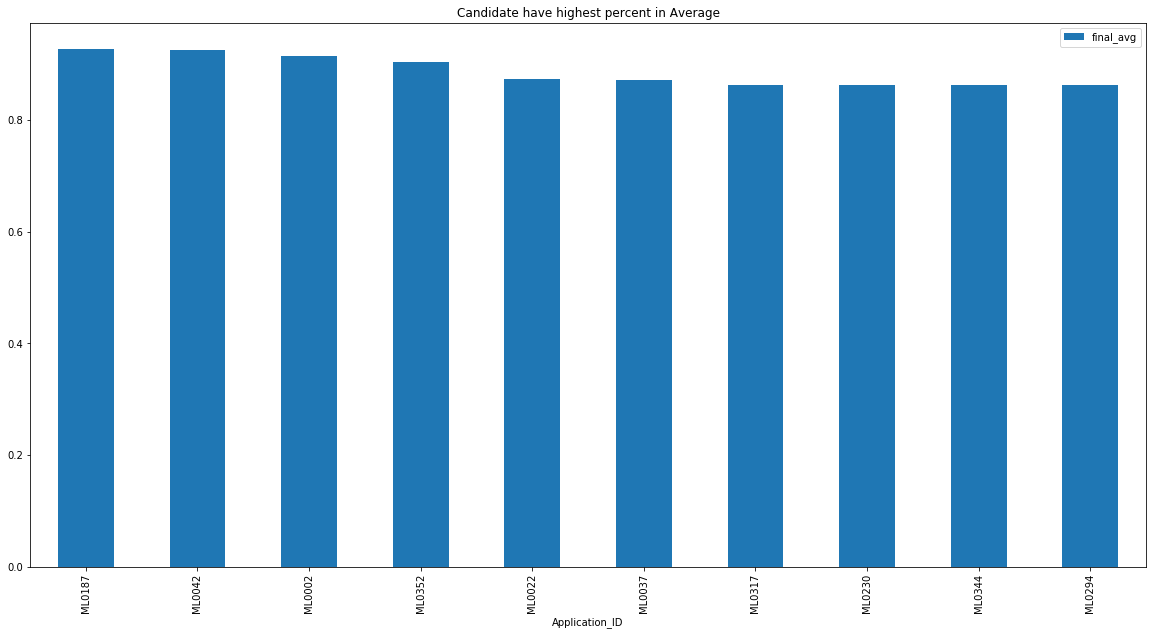

In [169]:
#Graph shows Top ten 'Data Scientist' Position candidates.

data1 = DS_Data[['Application_ID','final_avg']]
candidate_group = data1.groupby(['Application_ID'])
tot_candiate = candidate_group.sum()

tot_candiate.sort_values('final_avg', ascending=False, inplace=True)
top_ten = tot_candiate.head(10)
top_ten.plot(kind='bar', figsize=(20, 10), stacked=True, title='Candidate have highest percent in Average')


In [170]:
#Drop unwanted Columns
DS_Data1 = DS_Data.replace('NaN', 0)
DS_Data1 = DS_Data1.drop(['Application_ID'], axis=1)

Web_Data1 = web_data.replace('NaN', 0)
DS_Data1

,Python,R,DL,cal_PG,cal_UG,cal_12,cal_10,final_avg,Result
0,0,2,0,0.000,0.0000,0.0000,0.0000,0.000000,0
1,2,0,0,0.000,0.8550,0.9220,0.9660,0.914333,1
2,3,0,1,0.791,0.7000,0.6483,0.7760,0.728825,0
3,2,0,2,0.000,0.6860,0.7600,0.8432,0.763067,1
4,2,0,0,0.000,0.6380,0.6520,0.6880,0.659333,0
...,...,...,...,...,...,...,...,...,...
387,2,1,0,0.000,0.7500,0.0000,0.0000,0.250000,0
388,2,0,0,0.778,0.6800,0.0000,0.0000,0.364500,0
389,1,0,0,0.000,0.6100,0.6262,0.0000,0.412067,0
390,2,2,0,0.000,0.6500,0.6250,0.7650,0.680000,0


In [171]:
#Implement Logistic Algorithm to predict (ML Alogorithm)

def shortlist_logistic(df):
    
    x = df.iloc[:, df.columns != 'Result']
    y = df[df.columns[-1]]
    
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)
    
    logistic = LogisticRegression()
    
    logistic.fit(x_train, y_train)
    
    y_pred = logistic.predict(x_test)
    
    score = logistic.score(x_test, y_test)

    print("Accuracy Score : ",score*100)
    
    conf = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix :\n", conf)
    #print(logistic.predict([DS_Data1.iloc[4, 1:9]]))
    #print(logistic.predict([['2','0','0','0','0.855','0.9220','0.9660','0.914333']]))

In [172]:
#Function call for 'Web development' Job profile.
print("Web development job profile Predictions :\n")
shortlist_logistic(Web_Data1)

Web development job profile Predictions :

Accuracy Score :  91.13924050632912

Confusion Matrix :
 [[67  1]
 [ 6  5]]


In [173]:
#Function call for 'Data Scientist' Job profile.
print("Data scientist job profile Predictions :\n")
shortlist_logistic(DS_Data1)

Data scientist job profile Predictions :

Accuracy Score :  94.9367088607595

Confusion Matrix :
 [[68  0]
 [ 4  7]]
